# Plot Average Daily Ground Motion

This notebook loads data calculated in 1_calc_daily_noise and makes a pretty plot.

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
% matplotlib inline
plt.rcParams.update({'font.size': 18})


In [6]:
# Set x-axis limits for plotting
# datetime(YEAR, MONTH, DAY)
tmin = datetime(2020, 2, 9)
tmax = datetime(2020, 5, 15)

# Paths for loading data
fname = 'LD.CPNY.2020-02-09.2020-05-15.5_15Hz.BHZ'
datadir = './Data/'
timezone = 'America/New_York'  # timezone for correctly plotting datetimes


In [ ]:
# Load data into pandas dataframe
df = pd.read_csv(datadir+fname+'.csv',parse_dates=['t_cent'])

# NYC stay at home 2020/3/22 8pm EST (UTC - 4)
nyc_SAH = datetime(2020,3,22,20,0) + timedelta(0,4*60*60)

# NYC First COVID-19 death 2020/3/14 EST (UTC - 4)
nyc_1st = datetime(2020,3,14,0,0)

# NYC subway closed 1am-5am 2020/5/6 EST (UTC - 4)
nyc_subway = datetime(2020,5,6,0,0)

## Convert to local time

In [7]:
# Convert timestamps to NYC local time
df = df.set_index('t_cent').tz_localize('UTC').tz_convert(timezone)
df = df.reset_index()

## Make Plot

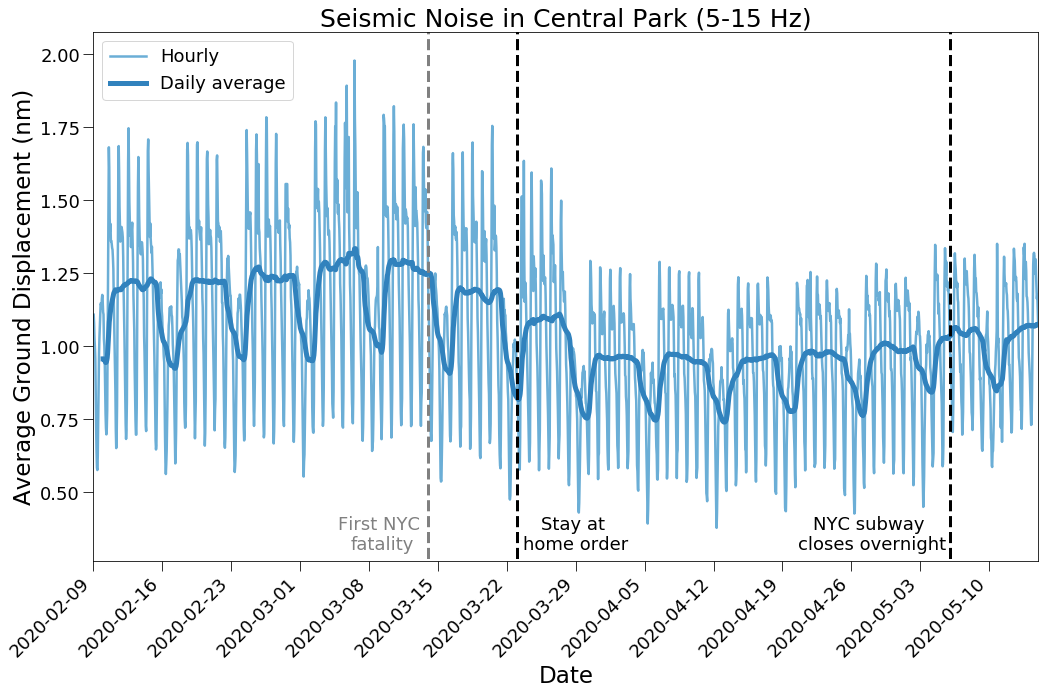

In [8]:
# Setup figure and plot hourly data
fig = plt.figure(figsize=(15,10))
plt.plot(df.t_cent,df.disp_avg*1e9,'-',color=cm.tab20c(1),linewidth=2.5,label='Hourly')

# Plot daily average
plt.plot(df.t_cent,df.daily_average*1e9,'-',linewidth=5,color=cm.tab20c(0),label='Daily average')

plt.plot([nyc_SAH, nyc_SAH],[0, 2.1],'--k',linewidth=3)
plt.text(nyc_SAH+timedelta(6.0),df.disp_avg.min()*1e9*0.8,'Stay at \nhome order',fontsize=18,horizontalalignment='center')
plt.plot([nyc_1st, nyc_1st],[0, 2.1],'--',linewidth=3,color='gray')
plt.text(nyc_1st-timedelta(4.7),df.disp_avg.min()*1e9*0.8,'First NYC \nfatality',color='gray',fontsize=18,horizontalalignment='center')
plt.plot([nyc_subway, nyc_subway],[0, 2.1],'--',linewidth=3,color='black')
plt.text(nyc_subway-timedelta(7.9),df.disp_avg.min()*1e9*0.8,'NYC subway \ncloses overnight',color='black',fontsize=18,horizontalalignment='center')

plt.ylabel('Average Ground Displacement (nm)',fontsize=23)
plt.xlabel('Date',fontsize=23)
plt.title('Seismic Noise in Central Park (5-15 Hz)',fontsize=25)
# plt.grid(True)
plt.xlim([tmin, tmax])
plt.ylim([df.disp_avg.min()*1e9*0.7, df.disp_avg.max()*1e9*1.05])
plt.tick_params('both', length=10, which='major')
plt.legend()
plt.xticks(np.arange(tmin, tmax, timedelta(days=7)))

# Rotate tick marks on x-axis
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.setp(plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')))
plt.tight_layout()
plt.show()
fig.savefig(fname+'.pdf')